In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage


%matplotlib inline

In [2]:
from fuel.streams import ServerDataStream

train_stream = ServerDataStream(('sax_features', 'targets', 'cases', 'sax', 'multiplier'), False)


In [3]:
ei = train_stream.get_epoch_iterator()

In [4]:
a = ei.next()
batch_size = len(a[0])

In [5]:
for i in range(batch_size):
    assert(a[3][0].shape == a[3][i].shape)
a[3][0].shape

(11, 30, 64, 64)

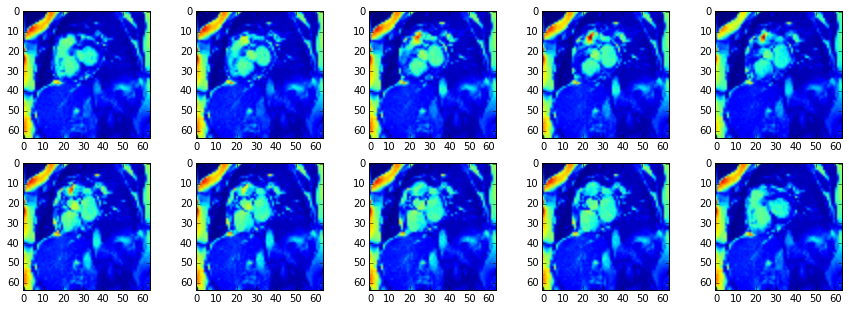

In [13]:
plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i)
    plt.imshow(a[3][0][0][i])

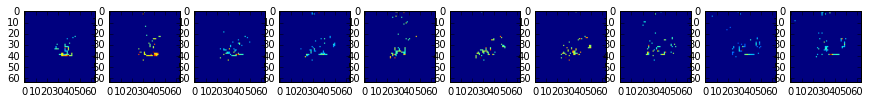

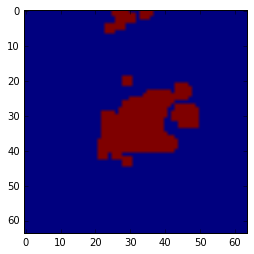

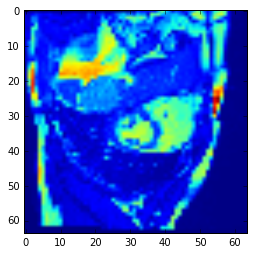

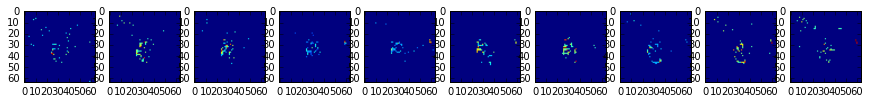

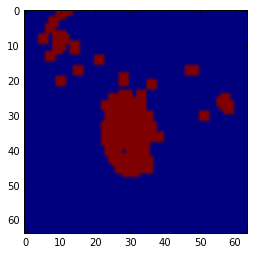

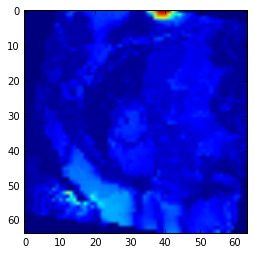

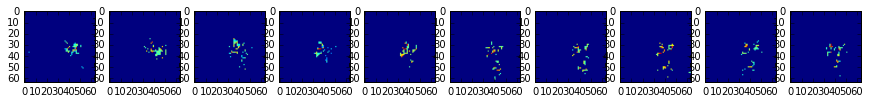

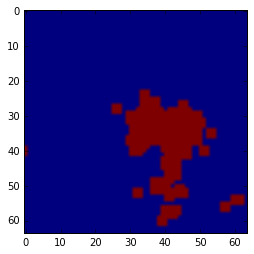

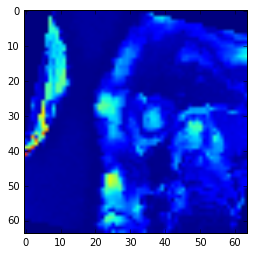

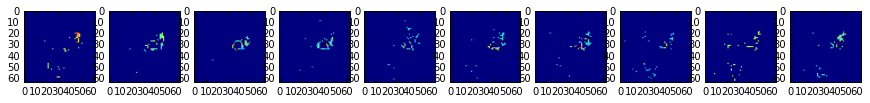

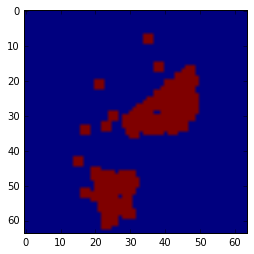

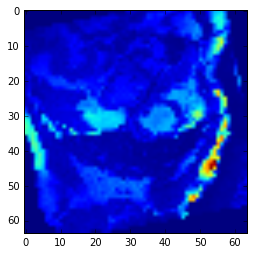

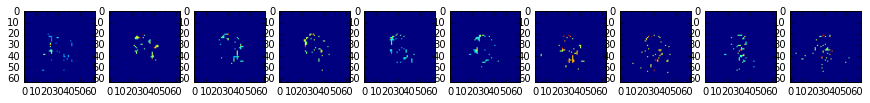

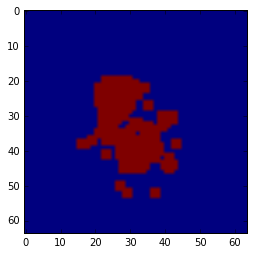

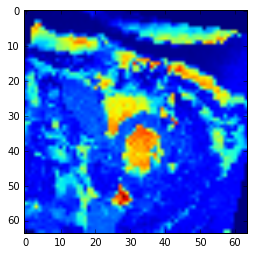

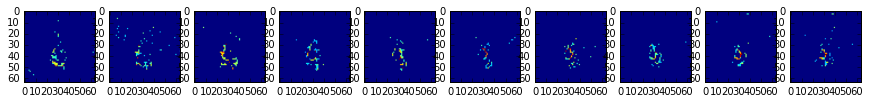

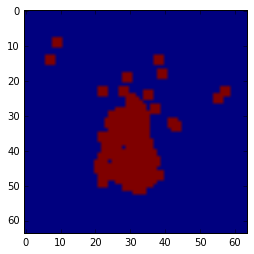

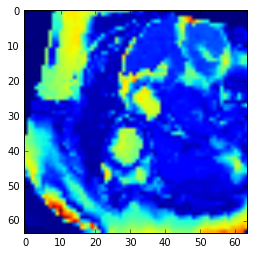

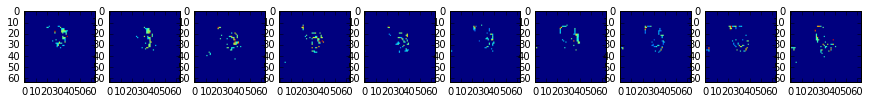

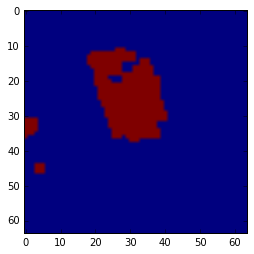

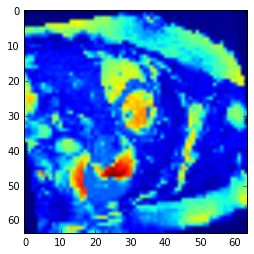

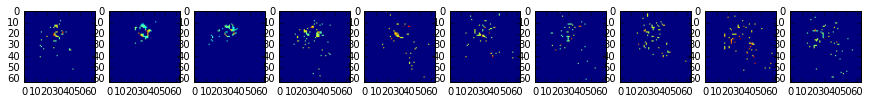

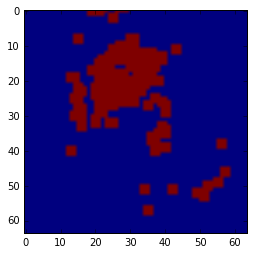

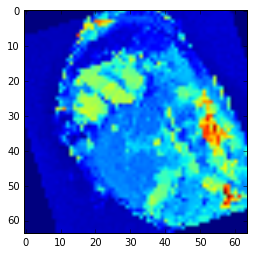

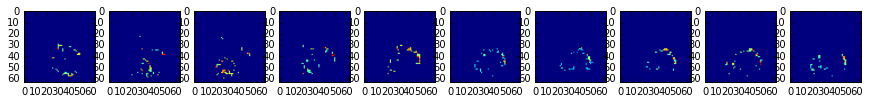

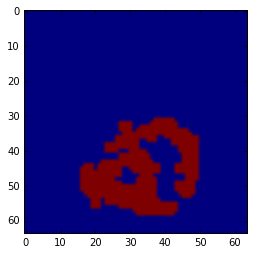

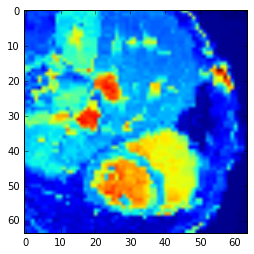

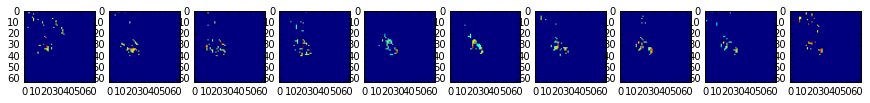

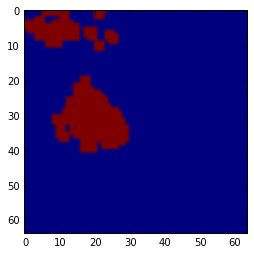

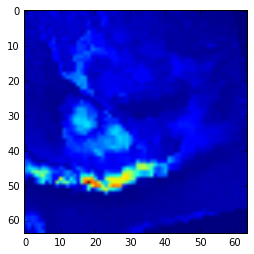

In [87]:
for i in range(min(10, len(d[1]))):
    plt.figure(figsize=(15, 5))
    acc = np.zeros(d[2][i][0].shape)
    for j in range(29):
        
        diff = np.abs(d[2][i][j+1]-d[2][i][j])
        diff[diff<np.percentile(diff, 99)] = 0
        diff = ndimage.grey_dilation(diff, size=(2, 2))
        diff = ndimage.grey_erosion(diff, size=(2, 2))
        acc += diff
        if j<10:
            plt.subplot(1, 10, j+1)
            plt.imshow(diff)
        
    plt.show()
    acc[acc<np.percentile(acc, 95)] = 0
    acc = ndimage.grey_dilation(acc, size=(2, 2))
    acc = ndimage.grey_erosion(acc, size=(2, 2))
    acc = ndimage.grey_dilation(acc, size=(2, 2))
    acc = ndimage.grey_erosion(acc, size=(2, 2))
    acc = ndimage.grey_dilation(acc, size=(2, 2))
    acc = ndimage.grey_dilation(acc, size=(2, 2))
    plt.imshow(acc>np.median(acc))
    plt.show()
    plt.imshow(d[2][i][0])
    plt.show()

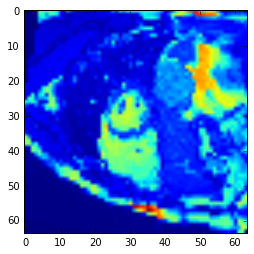

In [26]:
plt.imshow(d[2][0][0])


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

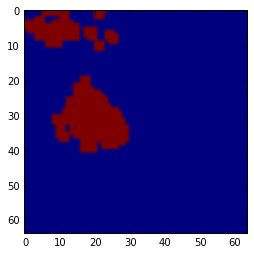

In [91]:
b = acc>np.median(acc)

plt.imshow(b)
b*1
